In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load dataset
dataset = pd.read_csv('1.csv')
dataset.head(5)

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496,186,276914.0,92305.0,...,1.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496,186,230984.0,76995.0,...,2.0,28.9,0.0,0.0,0.0,0.0,78.0,17.0,0.4,0.0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496,186,218470.0,72823.0,...,3.0,28.9,89.0,104.0,0.0,0.0,78.0,17.0,0.4,0.0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496,186,203376.0,67792.0,...,4.0,28.9,89.0,104.0,0.0,0.0,79.0,17.0,0.4,0.0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496,186,235723.0,78574.0,...,5.0,28.9,89.0,101.0,0.0,0.0,79.0,17.0,0.4,0.0


In [ ]:
dataset.shape

(16318, 44)

In [ ]:
# Preprocessing data
# Label Encoding
#le = LabelEncoder()
#dataset['target'] = le.fit_transform(dataset['target'])

In [ ]:
X = dataset.drop('Dir', axis=1,inplace=True)
x1 = dataset.drop('SrcAddr', axis=1,inplace=True)
x1 = dataset.drop('DstAddr', axis=1,inplace=True)
x1 = dataset.drop('Sport', axis=1,inplace=True)
x1 = dataset.drop('Dport', axis=1,inplace=True)
x1 = dataset.drop('SrcMac', axis=1,inplace=True)
x1 = dataset.drop('DstMac', axis=1,inplace=True)
df= dataset.drop('Flgs', axis=1)
#df=dataset.drop('Sport',axis=1)
print (df)

       SrcBytes  DstBytes   SrcLoad  DstLoad  SrcGap  DstGap     SIntPkt  \
0           496       186  276914.0  92305.0       0       0    3.582333   
1           496       186  230984.0  76995.0       0       0    4.294667   
2           496       186  218470.0  72823.0       0       0    4.540667   
3           496       186  203376.0  67792.0       0       0    4.877667   
4           496       186  235723.0  78574.0       0       0    4.208333   
...         ...       ...       ...      ...     ...     ...         ...   
13427       496       186  257529.0  85843.0       0       0    3.852000   
13428       496       186  266954.0  88985.0       0       0    3.716000   
13429       496       186  226071.0  75357.0       0       0    4.388000   
13430       496       186  284024.0  94675.0       0       0    3.492667   
13431       496       186    9389.0   3130.0       0       0  105.659336   

        DIntPkt  SIntPktAct  DIntPktAct  ...  Packet_num  Temp  SpO2  \
0        1.9015

In [ ]:
#df=df.replace('10.0.1.172',1)
#df=df.replace('10.0.1.150',2)
#df=df.replace('84:3a:4b:0f:5b:94',3)
#df=df.replace('d8:9e:f3:95:02:75',4)
#df=df.replace('b8:ca:3a:cf:0b:87',5)
#df.head(2)
#df.DstMac.unique()

In [ ]:
x1=df.SrcMac.unique()
print(x1)


[3 4]


In [ ]:
df.dtypes
df.isnull().sum()

SrcBytes      0
DstBytes      0
SrcLoad       0
DstLoad       0
SrcGap        0
DstGap        0
SIntPkt       0
DIntPkt       0
SIntPktAct    0
DIntPktAct    0
SrcJitter     0
DstJitter     0
sMaxPktSz     0
dMaxPktSz     0
sMinPktSz     0
dMinPktSz     0
Dur           0
Trans         0
TotPkts       0
TotBytes      0
Load          0
Loss          0
pLoss         0
pSrcLoss      0
pDstLoss      0
Rate          0
Packet_num    0
Temp          0
SpO2          0
Pulse_Rate    0
SYS           0
DIA           0
Heart_rate    0
Resp_Rate     0
ST            0
Label         0
dtype: int64

In [ ]:
df.head()

,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,496,186,276914.0,92305.0,0,0,3.582333,1.9015,0.0,0,...,1.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,496,186,230984.0,76995.0,0,0,4.294667,2.9015,0.0,0,...,2.0,28.9,0.0,0.0,0.0,0.0,78.0,17.0,0.4,0.0
2,496,186,218470.0,72823.0,0,0,4.540667,3.2945,0.0,0,...,3.0,28.9,89.0,104.0,0.0,0.0,78.0,17.0,0.4,0.0
3,496,186,203376.0,67792.0,0,0,4.877667,3.3320,0.0,0,...,4.0,28.9,89.0,104.0,0.0,0.0,79.0,17.0,0.4,0.0
4,496,186,235723.0,78574.0,0,0,4.208333,2.8635,0.0,0,...,5.0,28.9,89.0,101.0,0.0,0.0,79.0,17.0,0.4,0.0


In [ ]:
X = df.drop('Label', axis=1)
y = dataset.Label
X.head()

,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,DIntPktAct,...,Rate,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST
0,496,186,276914.0,92305.0,0,0,3.582333,1.9015,0.0,0,...,558.295,1.0,28.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,496,186,230984.0,76995.0,0,0,4.294667,2.9015,0.0,0,...,465.694,2.0,28.9,0.0,0.0,0.0,0.0,78.0,17.0,0.4
2,496,186,218470.0,72823.0,0,0,4.540667,3.2945,0.0,0,...,440.464,3.0,28.9,89.0,104.0,0.0,0.0,78.0,17.0,0.4
3,496,186,203376.0,67792.0,0,0,4.877667,3.3320,0.0,0,...,410.032,4.0,28.9,89.0,104.0,0.0,0.0,79.0,17.0,0.4
4,496,186,235723.0,78574.0,0,0,4.208333,2.8635,0.0,0,...,475.247,5.0,28.9,89.0,101.0,0.0,0.0,79.0,17.0,0.4


In [ ]:
#df['SrcAddr'] = pd.to_numeric(df["SrcAddr"],downcast='float')
#df['SrcAddr'] = pd.to_numeric(df["SrcAddr"],errors='coerce')
#df['DstAddr'] = pd.to_numeric(df["DstAddr"],errors='coerce')
#df['Sport'] = pd.to_numeric(df["Sport"],errors='coerce')
#df['SrcMac'] = pd.to_numeric(df["SrcMac"],errors='coerce')
#df['DstMac'] = pd.to_numeric(df["DstMac"],errors='coerce')
#print(df.dtypes)
#df.Sport.unique()
#df['Sport']=df['Sport'].fillna(df['Sport'].mean())

In [ ]:
# Split dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df.drop('Label', axis=1),
                                                    df['Label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
import numpy as np
from sklearn import svm


# Train an SVM classifier on the training set
cl = svm.SVC(kernel='linear', C=1, random_state=42)
cl.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred5 = cl.predict(X_test)
acc = accuracy_score(y_test, y_pred5)

print('Accuracy:', acc)


Accuracy: 0.9255514705882353


In [ ]:
# Calculate accuracy, sensitivity, and specificity
conf_mat = confusion_matrix(y_test, y_pred5)
accuracy = cl.score(X_test, y_test)
sensitivity = conf_mat.diagonal()/conf_mat.sum(axis=1)
specificity = (np.trace(conf_mat)-conf_mat.diagonal())/((conf_mat.shape[0]*conf_mat.shape[1])-np.sum(conf_mat))

# Print results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Test set accuracy: %f" % accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Best hyperparameters: ", grid_search.best_params_)

Cross-validation scores: [0.93489085 0.92837993 0.93527384 0.94101877 0.93639847]
Mean cross-validation score: 0.9351923706217873
Test set accuracy: 0.925551
Sensitivity:  [0.99473315 0.45192308]
Specificity:  [-0.05766871 -0.8690184 ]
Best hyperparameters:  {'learning_rate_init': 0.001}


In [ ]:
# Feature Scaling
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
import time
#Start time
start_time = time.time()

# Train model
clf = MLPClassifier(hidden_layer_sizes=(50, 50,50,50), max_iter=500, alpha=0.0001,
                    verbose=10,  random_state=5, tol=0.000000001)
clf.fit(X_train, y_train)

# End time
end_time = time.time()
# Print time taken
print("Time taken to train model: {:.2f} seconds".format(end_time - start_time))

Iteration 1, loss = 7.02541387
Iteration 2, loss = 5.82751466
Iteration 3, loss = 5.37640987
Iteration 4, loss = 5.09577484
Iteration 5, loss = 5.61431990
Iteration 6, loss = 5.53078896
Iteration 7, loss = 5.34090320
Iteration 8, loss = 5.10821080
Iteration 9, loss = 4.75807392
Iteration 10, loss = 4.63438301
Iteration 11, loss = 4.81769661
Iteration 12, loss = 4.47243582
Iteration 13, loss = 4.80902244
Iteration 14, loss = 4.53912900
Iteration 15, loss = 4.77797534
Iteration 16, loss = 4.77712058
Iteration 17, loss = 4.14206966
Iteration 18, loss = 4.56095327
Iteration 19, loss = 4.41799239
Iteration 20, loss = 4.39183109
Iteration 21, loss = 3.42978294
Iteration 22, loss = 4.52738894
Iteration 23, loss = 4.15243018
Iteration 24, loss = 4.27796251
Iteration 25, loss = 4.15930506
Iteration 26, loss = 5.83241303
Iteration 27, loss = 5.05753269
Iteration 28, loss = 4.16412555
Iteration 29, loss = 3.98564982
Iteration 30, loss = 4.14012473
Iteration 31, loss = 3.50390473
Iteration 32, los

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
#accuracy = clf.score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 92.89%


In [ ]:
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_pred, pos_label=1)
print("Sensitivity:", sensitivity)


Sensitivity: 0.13930348258706468


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate the specificity score
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.9940600978336828


KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=18
knn = KNeighborsClassifier(n_neighbors=18)

# Train the model on the training set
knn.fit(X_train_pca, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test_pca)

# Evaluate the accuracy of the model
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8725490196078431


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ -0.02570007,  -0.05829246,   0.81666448, ..., -10.59686476,
         -2.46008006,  -2.2115606 ],
       [ -0.02570007,  -0.05829246,   0.22420263, ...,   0.28759797,
         -0.35268602,   1.34142235],
       [ -0.02570007,  -0.05829246,   0.06278161, ...,   0.28759797,
         -0.35268602,   1.34142235],
       ...,
       [ -0.02570007,  -0.05829246,   0.16082869, ...,  -0.410124  ,
         -0.10475731,   0.45317661],
       [ -0.02570007,  -0.05829246,   0.90837804, ...,  -0.410124  ,
         -0.10475731,   0.45317661],
       [ -0.02570007,  -0.05829246,  -2.63420327, ...,          nan,
                 nan,          nan]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

ValueError: ignored

In [ ]:
X_pca

array([[-2.06057295e-01,  1.50251100e-02,  1.40529581e+00, ...,
         1.03290153e+01,  1.59880291e+01, -3.71995806e+00],
       [-2.90542830e-02, -3.81673475e-01,  1.16083179e+00, ...,
         5.67207318e+00,  2.32837659e+01, -5.77384631e+00],
       [-1.33202997e-01, -7.87851824e-02,  9.20050859e-01, ...,
        -1.75635764e-01, -3.86600539e-01, -5.05544552e-01],
       ...,
       [-4.44631486e-01,  8.22133274e-01,  6.27182118e-01, ...,
        -2.20844614e+00,  3.11289543e-01, -2.77865050e-01],
       [-2.94866059e-01,  2.86886433e-01,  5.56570130e-02, ...,
        -1.32928614e-01,  4.04837800e-01, -2.28294464e-01],
       [-4.17862391e-01,  7.43577989e-01,  5.31681251e-01, ...,
        -2.61188196e-01,  3.96635127e-01, -2.18341867e-01]])

In [ ]:
pca.n_components_

14

In [ ]:
pca.explained_variance_ratio_

array([0.24290965, 0.14408942, 0.12169736, 0.08413514, 0.08280942,
       0.05973078, 0.03950558, 0.03710242, 0.03333447, 0.03179337,
       0.02660276, 0.02336481, 0.01616186, 0.01550787])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Train an MLP classifier with GridSearchCV and learning rate hyperparameter
clf = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, alpha=0.0001,
                    verbose=10, random_state=5, tol=0.000000001,
                    activation='relu', solver='adam', batch_size=64)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)

# Evaluate the trained model
score = grid_search.score(X_test_pca, y_test)
print("Test set score: %f" % score)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

Iteration 1, loss = 0.31913954
Iteration 2, loss = 0.24917893
Iteration 3, loss = 0.23454951
Iteration 4, loss = 0.22478006
Iteration 5, loss = 0.21786061
Iteration 6, loss = 0.21214965
Iteration 7, loss = 0.21169689
Iteration 8, loss = 0.20251063
Iteration 9, loss = 0.19886334
Iteration 10, loss = 0.19708654
Iteration 11, loss = 0.19137171
Iteration 12, loss = 0.18787198
Iteration 13, loss = 0.18584792
Iteration 14, loss = 0.18329841
Iteration 15, loss = 0.17948354
Iteration 16, loss = 0.17641534
Iteration 17, loss = 0.17246807
Iteration 18, loss = 0.17433654
Iteration 19, loss = 0.16733546
Iteration 20, loss = 0.16530414


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.31864386
Iteration 2, loss = 0.24992970
Iteration 3, loss = 0.23259075
Iteration 4, loss = 0.22541621
Iteration 5, loss = 0.21899220
Iteration 6, loss = 0.21364271
Iteration 7, loss = 0.21092245
Iteration 8, loss = 0.20559803
Iteration 9, loss = 0.20302833
Iteration 10, loss = 0.19843973
Iteration 11, loss = 0.19190629
Iteration 12, loss = 0.19301795
Iteration 13, loss = 0.18677544
Iteration 14, loss = 0.18391379
Iteration 15, loss = 0.18482877
Iteration 16, loss = 0.18066266
Iteration 17, loss = 0.17867529
Iteration 18, loss = 0.17178342
Iteration 19, loss = 0.16910971
Iteration 20, loss = 0.16934861


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.31913016
Iteration 2, loss = 0.24998555
Iteration 3, loss = 0.23052037
Iteration 4, loss = 0.22332313
Iteration 5, loss = 0.21773875
Iteration 6, loss = 0.21127779
Iteration 7, loss = 0.20878148
Iteration 8, loss = 0.20228614
Iteration 9, loss = 0.19918886
Iteration 10, loss = 0.19307298
Iteration 11, loss = 0.18845221
Iteration 12, loss = 0.18657235
Iteration 13, loss = 0.18819953
Iteration 14, loss = 0.18041276
Iteration 15, loss = 0.17947999
Iteration 16, loss = 0.17629629
Iteration 17, loss = 0.16997777
Iteration 18, loss = 0.16895922
Iteration 19, loss = 0.16663064
Iteration 20, loss = 0.16507819


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.28599752
Iteration 2, loss = 0.24383371
Iteration 3, loss = 0.23458845
Iteration 4, loss = 0.23199733
Iteration 5, loss = 0.22511441
Iteration 6, loss = 0.21938460
Iteration 7, loss = 0.22456756
Iteration 8, loss = 0.21721394
Iteration 9, loss = 0.21241837
Iteration 10, loss = 0.20783343
Iteration 11, loss = 0.20315551
Iteration 12, loss = 0.20000406
Iteration 13, loss = 0.20077325
Iteration 14, loss = 0.19540601
Iteration 15, loss = 0.19366102
Iteration 16, loss = 0.18665249
Iteration 17, loss = 0.18804961
Iteration 18, loss = 0.18429461
Iteration 19, loss = 0.17891601
Iteration 20, loss = 0.18174052


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.29269731
Iteration 2, loss = 0.23939370
Iteration 3, loss = 0.23824443
Iteration 4, loss = 0.23287711
Iteration 5, loss = 0.23155934
Iteration 6, loss = 0.22251650
Iteration 7, loss = 0.21858058
Iteration 8, loss = 0.21502759
Iteration 9, loss = 0.22198159
Iteration 10, loss = 0.21163829
Iteration 11, loss = 0.20499581
Iteration 12, loss = 0.20951443
Iteration 13, loss = 0.20127136
Iteration 14, loss = 0.19936484
Iteration 15, loss = 0.19850301
Iteration 16, loss = 0.19397274
Iteration 17, loss = 0.18849428
Iteration 18, loss = 0.19045300
Iteration 19, loss = 0.18704501
Iteration 20, loss = 0.18684157


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.28729193
Iteration 2, loss = 0.24374669
Iteration 3, loss = 0.22776203
Iteration 4, loss = 0.22549575
Iteration 5, loss = 0.22164580
Iteration 6, loss = 0.21654776
Iteration 7, loss = 0.20951162
Iteration 8, loss = 0.21365650
Iteration 9, loss = 0.20912322
Iteration 10, loss = 0.20067303
Iteration 11, loss = 0.20113461
Iteration 12, loss = 0.19600083
Iteration 13, loss = 0.20174325
Iteration 14, loss = 0.20228236
Iteration 15, loss = 0.21441251
Iteration 16, loss = 0.20284158
Iteration 17, loss = 0.19407193
Iteration 18, loss = 0.18908267
Iteration 19, loss = 0.18305167
Iteration 20, loss = 0.18256161


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.40357121
Iteration 2, loss = 0.26061648
Iteration 3, loss = 0.25289995
Iteration 4, loss = 0.36286153
Iteration 5, loss = 0.34486994
Iteration 6, loss = 0.32011537
Iteration 7, loss = 0.33605219
Iteration 8, loss = 0.32277305
Iteration 9, loss = 0.29054770
Iteration 10, loss = 0.27005832
Iteration 11, loss = 0.30126759
Iteration 12, loss = 0.26393543
Iteration 13, loss = 0.26376698
Iteration 14, loss = 0.26594452
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.39100688
Iteration 2, loss = 0.35321494
Iteration 3, loss = 0.34616225
Iteration 4, loss = 0.36315051
Iteration 5, loss = 0.35644259
Iteration 6, loss = 0.36381144
Iteration 7, loss = 0.37513404
Iteration 8, loss = 0.37209841
Iteration 9, loss = 0.35262329
Iteration 10, loss = 0.34717676
Iteration 11, loss = 0.33690714
Iteration 12, loss = 0.33751322
Iteration 13, loss = 0.33786566
Iteration 14, loss = 0.35008250
Iteration 15, loss = 0.36421837


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.34125687
Iteration 2, loss = 0.40147802
Iteration 3, loss = 0.38158777
Iteration 4, loss = 0.38163470
Iteration 5, loss = 0.38196617
Iteration 6, loss = 0.38159858
Iteration 7, loss = 0.38210711
Iteration 8, loss = 0.38128102
Iteration 9, loss = 0.38067922
Iteration 10, loss = 0.38067514
Iteration 11, loss = 0.38051906
Iteration 12, loss = 0.38107484
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.29378767
Iteration 2, loss = 0.23786850
Iteration 3, loss = 0.22287776
Iteration 4, loss = 0.21734769
Iteration 5, loss = 0.21076838
Iteration 6, loss = 0.20386627
Iteration 7, loss = 0.20083564
Iteration 8, loss = 0.19531344
Iteration 9, loss = 0.19238007
Iteration 10, loss = 0.18659015
Iteration 11, loss = 0.18368471
Iteration 12, loss = 0.17862524
Iteration 13, loss = 0.17454521
Iteration 14, loss = 0.17133331
Iteration 15, loss = 0.16919724
Iteration 16, loss = 0.16638101
Iteration 17, loss = 0.16292259


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 94.39%


In [ ]:
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_pred, pos_label=1)
print("Sensitivity:", sensitivity)


Sensitivity: 0.6169154228855721


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate the specificity score
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.9898672257162823


In [ ]:
pca.explained_variance_ratio_

array([0.24290965, 0.14408942, 0.12169736, 0.08413514, 0.08280942,
       0.05973078, 0.03950558, 0.03710242, 0.03333447, 0.03179337,
       0.02660276, 0.02336481, 0.01616186, 0.01550787])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=18
knn = KNeighborsClassifier(n_neighbors=18)

# Train the model on the training set
knn.fit(X_train_pca, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test_pca)

# Evaluate the accuracy of the model
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.930453431372549


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=18
knn = KNeighborsClassifier(n_neighbors=18)

# Train the model on the training set
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9255514705882353


In [ ]:
import numpy as np
from sklearn import svm


# Train an SVM classifier on the training set
clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train_pca, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)

print('Accuracy:', acc)


Accuracy: 0.9249387254901961


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ -0.0227494 ,  -0.05766847,   0.81928062, ..., -11.41550613,
         -2.68858057,  -2.48138523],
       [ -0.0227494 ,  -0.05766847,   0.24101703, ...,   0.38676231,
         -0.36796157,   1.36561766],
       [ -0.0227494 ,  -0.05766847,   0.08346444, ...,   0.38676231,
         -0.36796157,   1.36561766],
       ...,
       [ -0.0227494 ,  -0.05766847,   0.96600572, ...,  -0.36979336,
         -0.09494757,   0.40386693],
       [ -0.0227494 ,  -0.05766847,   0.32676824, ...,  -0.36979336,
         -0.09494757,   0.40386693],
       [ -0.0227494 ,  -0.05766847,   0.84214425, ...,  -0.36979336,
         -0.09494757,   0.40386693]])

In [ ]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(16318, 14)

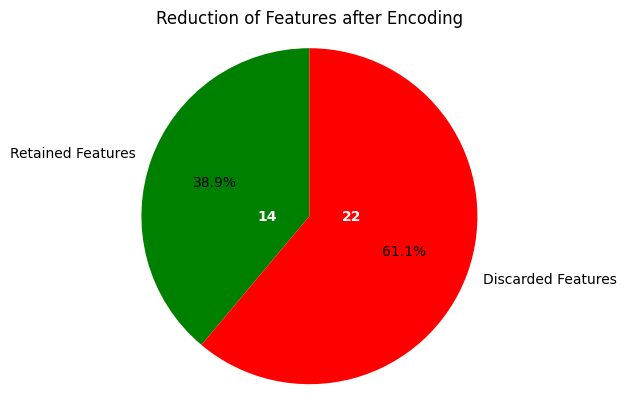

In [ ]:
import matplotlib.pyplot as plt

# Define the number of features before and after encoding
num_features_before_encoding = 36
num_features_after_encoding = 14

# Compute the number of features retained and discarded
num_features_retained = num_features_after_encoding
num_features_discarded = num_features_before_encoding - num_features_after_encoding

# Create labels for the pie chart
labels = ['Retained Features', 'Discarded Features']

# Create sizes for the pie chart
sizes = [num_features_retained, num_features_discarded]

# Create colors for the pie chart
colors = ['green', 'red']

# Create values for the pie chart
values = [num_features_retained, num_features_discarded]

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Reduction of Features after Encoding')

# Add values to the segments of the pie chart
for i, value in enumerate(values):
    plt.text(0.5 * (i - 0.5), 0, str(value), color='white', fontweight='bold', ha='center', va='center')

plt.show()


In [ ]:
import pandas as pd

input_file = '/content/wustl-ehms-2020.csv'  # Path to the input CSV file
output_directory = '/content/1.csv'  # Path to the output directory where split files will be saved
columns_to_split = ['Dir', 'Packet_num']  # Specify the columns to split on

# Read the input CSV file into a DataFrame
df = pd.read_csv(input_file)

# Iterate over the unique combinations of values in the specified columns
for _, group in df.groupby(columns_to_split):
    # Generate a unique filename based on the column values
    filename = '_'.join(str(val) for val in group.iloc[0][columns_to_split]) + '.csv'
    output_file = output_directory + filename

    # Save the grouped data as a separate CSV file
    group.to_csv(output_file, index=False)

print("CSV file splitting complete.")


CSV file splitting complete.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier


# Define the parameters for input layer, hidden layer, and output layer
input_layer_size = X.shape[1]  # Number of features in the input data
hidden_layer_sizes = (100, 50)  # Size of each hidden layer
output_layer_size = len(y.unique())  # Number of classes in the output (i.e., number of neurons in the output layer)
import time
#Start time
start_time = time.time()
# Create the MLP classifier with the specified layer sizes
mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', max_iter=500)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform k-fold cross-validation on the training data
k = 5  # number of folds
scores = cross_val_score(mlp_classifier, X_train, y_train, cv=k)

clf.fit(X_train, y_train)

# Train the classifier on the full training set
mlp_classifier.fit(X_train, y_train)
# End time
end_time = time.time()
# Print time taken
print("Time taken to train model: {:.2f} seconds".format(end_time - start_time))
# Evaluate the classifier on the testing set
score = mlp_classifier.score(X_test, y_test)

print("Average cross-validation accuracy: {:.2f}".format(scores.mean()))
print("Testing accuracy: {:.2f}".format(score))


Iteration 1, loss = 7.56992455
Iteration 2, loss = 5.92078998
Iteration 3, loss = 5.40999195
Iteration 4, loss = 5.69510345
Iteration 5, loss = 5.00958827
Iteration 6, loss = 4.84724470
Iteration 7, loss = 5.10889102
Iteration 8, loss = 5.18258025
Iteration 9, loss = 5.32054212
Iteration 10, loss = 4.94161732
Iteration 11, loss = 4.80192921
Iteration 12, loss = 4.48279439
Iteration 13, loss = 4.62499284
Iteration 14, loss = 4.65805370
Iteration 15, loss = 4.49946378
Iteration 16, loss = 3.92993915
Iteration 17, loss = 4.17708591
Iteration 18, loss = 4.44195968
Iteration 19, loss = 3.83410377
Iteration 20, loss = 3.92259130
Iteration 21, loss = 4.09856110
Iteration 22, loss = 3.82643138
Iteration 23, loss = 3.82142756
Iteration 24, loss = 3.82785512
Iteration 25, loss = 3.47254868
Iteration 26, loss = 4.23170945
Iteration 27, loss = 3.94111104
Iteration 28, loss = 3.17079667
Iteration 29, loss = 3.13351179
Iteration 30, loss = 3.16338692
Iteration 31, loss = 2.96654721
Iteration 32, los

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier


# Define the parameters for input layer, hidden layer, and output layer
input_layer_size = X.shape[1]  # Number of features in the input data
hidden_layer_sizes = (100, 50)  # Size of each hidden layer
output_layer_size = len(y.unique())  # Number of classes in the output (i.e., number of neurons in the output layer)
import time
#Start time
start_time = time.time()
# Create the MLP classifier with the specified layer sizes
mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', max_iter=500)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Perform k-fold cross-validation on the training data
k = 5  # number of folds
scores = cross_val_score(mlp_classifier, X_train, y_train, cv=k)

clf.fit(X_train, y_train)

# End time
end_time = time.time()
# Print time taken
print("Time taken to train model: {:.2f} seconds".format(end_time - start_time))

# Train the classifier on the full training set
mlp_classifier.fit(X_train, y_train)

# Evaluate the classifier on the testing set
score = mlp_classifier.score(X_test, y_test)

print("Average cross-validation accuracy: {:.2f}".format(scores.mean()))
print("Testing accuracy: {:.2f}".format(score))


Iteration 1, loss = 0.34498305
Iteration 2, loss = 0.26130436
Iteration 3, loss = 0.23777956
Iteration 4, loss = 0.22856495
Iteration 5, loss = 0.22042747
Iteration 6, loss = 0.21444204
Iteration 7, loss = 0.20872061
Iteration 8, loss = 0.20526411
Iteration 9, loss = 0.19989884
Iteration 10, loss = 0.19695656
Iteration 11, loss = 0.19366645
Iteration 12, loss = 0.18949201
Iteration 13, loss = 0.18750968
Iteration 14, loss = 0.18446035
Iteration 15, loss = 0.18110066
Iteration 16, loss = 0.18094116
Iteration 17, loss = 0.17668038
Iteration 18, loss = 0.17441097
Iteration 19, loss = 0.17060632
Iteration 20, loss = 0.16977901
Iteration 21, loss = 0.16814344
Iteration 22, loss = 0.16605019
Iteration 23, loss = 0.16340563
Iteration 24, loss = 0.15967678
Iteration 25, loss = 0.16100704
Iteration 26, loss = 0.15850639
Iteration 27, loss = 0.16261859
Iteration 28, loss = 0.15731580
Iteration 29, loss = 0.15392136
Iteration 30, loss = 0.15021089
Iteration 31, loss = 0.14984303
Iteration 32, los

MLP with pca

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
clf = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, alpha=0.0001,
                    verbose=10, random_state=5, tol=0.000000001,
                    activation='relu', solver='adam', batch_size=64,
                    # Set logistic activation for the output layer
                    )

# Use GridSearchCV with 3-fold cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)
best_clf = grid_search.best_estimator_

# Use cross-validation with 5 folds to evaluate the trained model
scores = cross_val_score(best_clf, X_train_pca, y_train, cv=5)

# Evaluate the trained model on the test set
y_pred = best_clf.predict(X_test_pca)

Iteration 1, loss = 0.31913954
Iteration 2, loss = 0.24917893
Iteration 3, loss = 0.23454951
Iteration 4, loss = 0.22478006
Iteration 5, loss = 0.21786061
Iteration 6, loss = 0.21214965
Iteration 7, loss = 0.21169689
Iteration 8, loss = 0.20251063
Iteration 9, loss = 0.19886334
Iteration 10, loss = 0.19708654
Iteration 11, loss = 0.19137171
Iteration 12, loss = 0.18787198
Iteration 13, loss = 0.18584792
Iteration 14, loss = 0.18329841
Iteration 15, loss = 0.17948354
Iteration 16, loss = 0.17641534
Iteration 17, loss = 0.17246807
Iteration 18, loss = 0.17433654
Iteration 19, loss = 0.16733546
Iteration 20, loss = 0.16530414


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.31864386
Iteration 2, loss = 0.24992970
Iteration 3, loss = 0.23259075
Iteration 4, loss = 0.22541621
Iteration 5, loss = 0.21899220
Iteration 6, loss = 0.21364271
Iteration 7, loss = 0.21092245
Iteration 8, loss = 0.20559803
Iteration 9, loss = 0.20302833
Iteration 10, loss = 0.19843973
Iteration 11, loss = 0.19190629
Iteration 12, loss = 0.19301795
Iteration 13, loss = 0.18677544
Iteration 14, loss = 0.18391379
Iteration 15, loss = 0.18482877
Iteration 16, loss = 0.18066266
Iteration 17, loss = 0.17867529
Iteration 18, loss = 0.17178342
Iteration 19, loss = 0.16910971
Iteration 20, loss = 0.16934861


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.31913016
Iteration 2, loss = 0.24998555
Iteration 3, loss = 0.23052037
Iteration 4, loss = 0.22332313
Iteration 5, loss = 0.21773875
Iteration 6, loss = 0.21127779
Iteration 7, loss = 0.20878148
Iteration 8, loss = 0.20228614
Iteration 9, loss = 0.19918886
Iteration 10, loss = 0.19307298
Iteration 11, loss = 0.18845221
Iteration 12, loss = 0.18657235
Iteration 13, loss = 0.18819953
Iteration 14, loss = 0.18041276
Iteration 15, loss = 0.17947999
Iteration 16, loss = 0.17629629
Iteration 17, loss = 0.16997777
Iteration 18, loss = 0.16895922
Iteration 19, loss = 0.16663064
Iteration 20, loss = 0.16507819


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.28599752
Iteration 2, loss = 0.24383371
Iteration 3, loss = 0.23458845
Iteration 4, loss = 0.23199733
Iteration 5, loss = 0.22511441
Iteration 6, loss = 0.21938460
Iteration 7, loss = 0.22456756
Iteration 8, loss = 0.21721394
Iteration 9, loss = 0.21241837
Iteration 10, loss = 0.20783343
Iteration 11, loss = 0.20315551
Iteration 12, loss = 0.20000406
Iteration 13, loss = 0.20077325
Iteration 14, loss = 0.19540601
Iteration 15, loss = 0.19366102
Iteration 16, loss = 0.18665249
Iteration 17, loss = 0.18804961
Iteration 18, loss = 0.18429461
Iteration 19, loss = 0.17891601
Iteration 20, loss = 0.18174052


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.29269731
Iteration 2, loss = 0.23939370
Iteration 3, loss = 0.23824443
Iteration 4, loss = 0.23287711
Iteration 5, loss = 0.23155934
Iteration 6, loss = 0.22251650
Iteration 7, loss = 0.21858058
Iteration 8, loss = 0.21502759
Iteration 9, loss = 0.22198159
Iteration 10, loss = 0.21163829
Iteration 11, loss = 0.20499581
Iteration 12, loss = 0.20951443
Iteration 13, loss = 0.20127136
Iteration 14, loss = 0.19936484
Iteration 15, loss = 0.19850301
Iteration 16, loss = 0.19397274
Iteration 17, loss = 0.18849428
Iteration 18, loss = 0.19045300
Iteration 19, loss = 0.18704501
Iteration 20, loss = 0.18684157


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.28729193
Iteration 2, loss = 0.24374669
Iteration 3, loss = 0.22776203
Iteration 4, loss = 0.22549575
Iteration 5, loss = 0.22164580
Iteration 6, loss = 0.21654776
Iteration 7, loss = 0.20951162
Iteration 8, loss = 0.21365650
Iteration 9, loss = 0.20912322
Iteration 10, loss = 0.20067303
Iteration 11, loss = 0.20113461
Iteration 12, loss = 0.19600083
Iteration 13, loss = 0.20174325
Iteration 14, loss = 0.20228236
Iteration 15, loss = 0.21441251
Iteration 16, loss = 0.20284158
Iteration 17, loss = 0.19407193
Iteration 18, loss = 0.18908267
Iteration 19, loss = 0.18305167
Iteration 20, loss = 0.18256161


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.40357121
Iteration 2, loss = 0.26061648
Iteration 3, loss = 0.25289995
Iteration 4, loss = 0.36286153
Iteration 5, loss = 0.34486994
Iteration 6, loss = 0.32011537
Iteration 7, loss = 0.33605219
Iteration 8, loss = 0.32277305
Iteration 9, loss = 0.29054770
Iteration 10, loss = 0.27005832
Iteration 11, loss = 0.30126759
Iteration 12, loss = 0.26393543
Iteration 13, loss = 0.26376698
Iteration 14, loss = 0.26594452
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.39100688
Iteration 2, loss = 0.35321494
Iteration 3, loss = 0.34616225
Iteration 4, loss = 0.36315051
Iteration 5, loss = 0.35644259
Iteration 6, loss = 0.36381144
Iteration 7, loss = 0.37513404
Iteration 8, loss = 0.37209841
Iteration 9, loss = 0.35262329
Iteration 10, loss = 0.34717676
Iteration 11, loss = 0.33690714
Iteration 12, loss = 0.33751322
Iteration 13, loss = 0.33786566
Iteration 14, loss = 0.35008250
Iteration 15, loss = 0.36421837


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.34125687
Iteration 2, loss = 0.40147802
Iteration 3, loss = 0.38158777
Iteration 4, loss = 0.38163470
Iteration 5, loss = 0.38196617
Iteration 6, loss = 0.38159858
Iteration 7, loss = 0.38210711
Iteration 8, loss = 0.38128102
Iteration 9, loss = 0.38067922
Iteration 10, loss = 0.38067514
Iteration 11, loss = 0.38051906
Iteration 12, loss = 0.38107484
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.29378767
Iteration 2, loss = 0.23786850
Iteration 3, loss = 0.22287776
Iteration 4, loss = 0.21734769
Iteration 5, loss = 0.21076838
Iteration 6, loss = 0.20386627
Iteration 7, loss = 0.20083564
Iteration 8, loss = 0.19531344
Iteration 9, loss = 0.19238007
Iteration 10, loss = 0.18659015
Iteration 11, loss = 0.18368471
Iteration 12, loss = 0.17862524
Iteration 13, loss = 0.17454521
Iteration 14, loss = 0.17133331
Iteration 15, loss = 0.16919724
Iteration 16, loss = 0.16638101
Iteration 17, loss = 0.16292259


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.23967493
Iteration 3, loss = 0.22792836
Iteration 4, loss = 0.21738608
Iteration 5, loss = 0.21441542
Iteration 6, loss = 0.20767200
Iteration 7, loss = 0.20431215
Iteration 8, loss = 0.20025742
Iteration 9, loss = 0.19951869
Iteration 10, loss = 0.19137025
Iteration 11, loss = 0.18802461
Iteration 12, loss = 0.18494114
Iteration 13, loss = 0.18193464
Iteration 14, loss = 0.17855299
Iteration 15, loss = 0.17548650
Iteration 16, loss = 0.17081104
Iteration 17, loss = 0.16811068
Iteration 18, loss = 0.16676409
Iteration 19, loss = 0.16266374
Iteration 20, loss = 0.16178370


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.30415209
Iteration 2, loss = 0.24306255
Iteration 3, loss = 0.23248200
Iteration 4, loss = 0.22458746
Iteration 5, loss = 0.21728284
Iteration 6, loss = 0.21150708
Iteration 7, loss = 0.20544396
Iteration 8, loss = 0.20240432
Iteration 9, loss = 0.19781991
Iteration 10, loss = 0.19080917
Iteration 11, loss = 0.18858427
Iteration 12, loss = 0.18313203
Iteration 13, loss = 0.18233101
Iteration 14, loss = 0.17738133
Iteration 15, loss = 0.17613033
Iteration 16, loss = 0.17291589
Iteration 17, loss = 0.16743505
Iteration 18, loss = 0.16703042
Iteration 19, loss = 0.16463381
Iteration 20, loss = 0.16305630


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.31123760
Iteration 2, loss = 0.24376942
Iteration 3, loss = 0.22828226
Iteration 4, loss = 0.22506647
Iteration 5, loss = 0.21687141
Iteration 6, loss = 0.21197248
Iteration 7, loss = 0.20625686
Iteration 8, loss = 0.20482251
Iteration 9, loss = 0.19823146
Iteration 10, loss = 0.19455476
Iteration 11, loss = 0.19014009
Iteration 12, loss = 0.18698514
Iteration 13, loss = 0.18647328
Iteration 14, loss = 0.18107716
Iteration 15, loss = 0.18174222
Iteration 16, loss = 0.17571140
Iteration 17, loss = 0.17556345
Iteration 18, loss = 0.17043549
Iteration 19, loss = 0.17016196
Iteration 20, loss = 0.16614031


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.30202981
Iteration 2, loss = 0.23835834
Iteration 3, loss = 0.22520199
Iteration 4, loss = 0.21786149
Iteration 5, loss = 0.21128564
Iteration 6, loss = 0.20449022
Iteration 7, loss = 0.20078555
Iteration 8, loss = 0.19862230
Iteration 9, loss = 0.19299775
Iteration 10, loss = 0.18783653
Iteration 11, loss = 0.18623817
Iteration 12, loss = 0.18107506
Iteration 13, loss = 0.17862592
Iteration 14, loss = 0.17576256
Iteration 15, loss = 0.17121530
Iteration 16, loss = 0.16688363
Iteration 17, loss = 0.16764082
Iteration 18, loss = 0.16622430
Iteration 19, loss = 0.16377359
Iteration 20, loss = 0.15992212


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.30847262
Iteration 2, loss = 0.24395910
Iteration 3, loss = 0.22886506
Iteration 4, loss = 0.21874656
Iteration 5, loss = 0.21270937
Iteration 6, loss = 0.20899151
Iteration 7, loss = 0.20175472
Iteration 8, loss = 0.19864703
Iteration 9, loss = 0.19453027
Iteration 10, loss = 0.18977418
Iteration 11, loss = 0.18392096
Iteration 12, loss = 0.18092278
Iteration 13, loss = 0.17896836
Iteration 14, loss = 0.17652896
Iteration 15, loss = 0.17245583
Iteration 16, loss = 0.17097204
Iteration 17, loss = 0.16849811
Iteration 18, loss = 0.16461171
Iteration 19, loss = 0.16445414
Iteration 20, loss = 0.15997690


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Calculate accuracy, sensitivity, and specificity
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = best_clf.score(X_test_pca, y_test)
sensitivity = conf_mat.diagonal()/conf_mat.sum(axis=1)
specificity = (np.trace(conf_mat)-conf_mat.diagonal())/((conf_mat.shape[0]*conf_mat.shape[1])-np.sum(conf_mat))

# Print results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Test set accuracy: %f" % accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Best hyperparameters: ", grid_search.best_params_)

Cross-validation scores: [0.93910379 0.94216775 0.93948679 0.93680582 0.94291188]
Mean cross-validation score: 0.9400952058121328
Test set accuracy: 0.935049
Sensitivity:  [0.98322851 0.5920398 ]
Specificity:  [-0.07300613 -0.86319018]
Best hyperparameters:  {'learning_rate_init': 0.001}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)
# Perform 10-fold cross-validation on the training data and calculate the mean accuracy score
scores = cross_val_score(svm, X_train, y_train, cv=10)
mean_accuracy = scores.mean()

print("Mean accuracy:", mean_accuracy)


Mean accuracy: 0.9270723392770179


In [ ]:

# Evaluate the classifier on the testing set
y_pred6 = svm.predict(X_test_pca)

In [ ]:
# Calculate accuracy, sensitivity, and specificity
conf_mat = confusion_matrix(y_test, y_pred6)
accuracy = best_clf.score(X_test_pca, y_test)
sensitivity = conf_mat.diagonal()/conf_mat.sum(axis=1)
specificity = (np.trace(conf_mat)-conf_mat.diagonal())/((conf_mat.shape[0]*conf_mat.shape[1])-np.sum(conf_mat))

# Print results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Test set accuracy: %f" % accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Best hyperparameters: ", grid_search.best_params_)

Cross-validation scores: [0.93032159 0.9287902  0.92343032 0.92343032 0.9302682  0.92183908
 0.92873563 0.92260536 0.92796935 0.93333333]
Mean cross-validation score: 0.9270723392770179
Test set accuracy: 0.810662
Sensitivity:  [1. 0.]
Specificity:  [-0.         -0.87361963]
Best hyperparameters:  {'learning_rate_init': 0.001}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load your training data into X_train and y_train arrays

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=10)

# Define the number of folds for cross-validation
num_folds = 5

# Define the k-fold cross-validation technique
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation on the training data
scores = cross_val_score(knn, X_train, y_train, cv=kfold)
# Train the model on the training set
knn.fit(X_train_pca, y_train)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))


Cross-validation scores: [0.93489085 0.92837993 0.93527384 0.94101877 0.93639847]
Mean accuracy: 0.94
Standard deviation: 0.00


In [ ]:
knn.fit(X_train_pca, y_train)
# Predict the labels of the test set
y_pred4 = knn.predict(X_test_pca)

# Evaluate the accuracy of the model
accuracy = knn.score(X_test_pca, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Calculate accuracy, sensitivity, and specificity
conf_mat = confusion_matrix(y_test, y_pred4)
accuracy = knn.score(X_test_pca, y_test)
sensitivity = conf_mat.diagonal()/conf_mat.sum(axis=1)
specificity = (np.trace(conf_mat)-conf_mat.diagonal())/((conf_mat.shape[0]*conf_mat.shape[1])-np.sum(conf_mat))

# Print results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Test set accuracy: %f" % accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Cross-validation scores: [0.93032159 0.9287902  0.92343032 0.92343032 0.9302682  0.92183908
 0.92873563 0.92260536 0.92796935 0.93333333]
Mean cross-validation score: 0.9270723392770179
Test set accuracy: 0.872243
Sensitivity:  [0.99929775 0.00240385]
Specificity:  [-3.06748466e-04 -8.73006135e-01]


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()

# Calculate the specificity score
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Specificity: 0.9992977528089888


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train a Gaussian Naive Bayes classifier on the training set
clf = GaussianNB()
clf.fit(X_train_pca, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)

print('Accuracy:', acc)


Accuracy: 0.788296568627451


In [ ]:
# Calculate accuracy, sensitivity, and specificity
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = knn.score(X_test_pca, y_test)
sensitivity = conf_mat.diagonal()/conf_mat.sum(axis=1)
specificity = (np.trace(conf_mat)-conf_mat.diagonal())/((conf_mat.shape[0]*conf_mat.shape[1])-np.sum(conf_mat))

# Print results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Test set accuracy: %f" % accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Cross-validation scores: [0.93032159 0.9287902  0.92343032 0.92343032 0.9302682  0.92183908
 0.92873563 0.92260536 0.92796935 0.93333333]
Mean cross-validation score: 0.9270723392770179
Test set accuracy: 0.872243
Sensitivity:  [0.93328652 0.0625    ]
Specificity:  [-0.00797546 -0.81533742]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train a Gaussian Naive Bayes classifier on the training set
clf = GaussianNB()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('Accuracy:', acc)


Accuracy: 0.8762254901960784


In [ ]:
# Calculate accuracy, sensitivity, and specificity
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = knn.score(X_test_pca, y_test)
sensitivity = conf_mat.diagonal()/conf_mat.sum(axis=1)
specificity = (np.trace(conf_mat)-conf_mat.diagonal())/((conf_mat.shape[0]*conf_mat.shape[1])-np.sum(conf_mat))

# Print results
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Test set accuracy: %f" % accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Cross-validation scores: [0.93032159 0.9287902  0.92343032 0.92343032 0.9302682  0.92183908
 0.92873563 0.92260536 0.92796935 0.93333333]
Mean cross-validation score: 0.9270723392770179
Test set accuracy: 0.872243
Sensitivity:  [0.96488764 0.26923077]
Specificity:  [-0.03435583 -0.84294479]
